# Advanced Clustering

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [17]:
df = pd.read_csv('.\data\csv_data\X_TR_561_SENZA_OUTLIERS.csv')
y = pd.read_csv('.\data\csv_data\Y_TR_561_SENZA_OUTLIERS.csv')

In [18]:
# standardization
from sklearn.preprocessing import MinMaxScaler 
L = MinMaxScaler()
X = L.fit_transform(df)

In [22]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(X)
X_train_pca = pca.transform(X)

In [24]:
print(sum(pca.explained_variance_ratio_))

0.8111092551212749


## XMEANS k = 20

In [25]:
from pyclustering.cluster import xmeans

In [26]:
xm = xmeans.xmeans(X_train_pca, kmax=20)
xm.process()

In [27]:
clusters = xm.get_clusters()
centers = xm.get_centers()

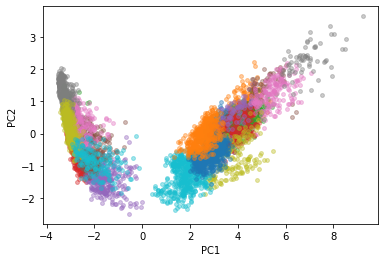

In [44]:
for indexes in clusters:
    plt.scatter(X_train_pca[indexes,0], X_train_pca[indexes,1], alpha = 0.4, s = 15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# for c in centers:
#     plt.scatter(c[0], c[1], s=100, edgecolors='k')

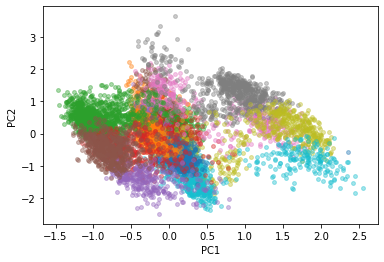

In [43]:
for indexes in clusters:
    plt.scatter(X_train_pca[indexes,2], X_train_pca[indexes,1], alpha = 0.4, s = 15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [45]:
print("Total WCE:", xm.get_total_wce())

Total WCE: 8090.03980104622


In [46]:
from pyclustering.cluster.silhouette import silhouette
score = silhouette(X_train_pca, clusters).process().get_score()

In [47]:
from numpy import mean
mean(score)

0.34150310574119336

## XMEANS k = 10

In [48]:
xm2 = xmeans.xmeans(X_train_pca, kmax=10)
xm2.process()

In [49]:
clusters2 = xm2.get_clusters()
centers2 = xm2.get_centers()

In [50]:
print("Total WCE:", xm2.get_total_wce())

Total WCE: 10806.191111546656


In [51]:
score2 = silhouette(X_train_pca, clusters2).process().get_score()

In [52]:
mean(score2)

0.3897374232474833

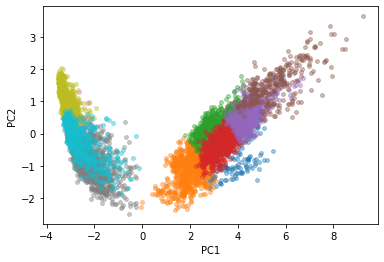

In [53]:
for indexes in clusters2:
    plt.scatter(X_train_pca[indexes,0], X_train_pca[indexes,1], alpha = 0.4, s = 15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## XMEANS k = 6

In [54]:
xm3 = xmeans.xmeans(X_train_pca, kmax=6)
xm3.process()

In [55]:
clusters3 = xm3.get_clusters()
centers3 = xm3.get_centers()

In [56]:
print("Total WCE:", xm3.get_total_wce())

Total WCE: 14689.439091415805


In [57]:
score3 = silhouette(X_train_pca, clusters3).process().get_score()

In [58]:
mean(score3)

0.4288045573269775

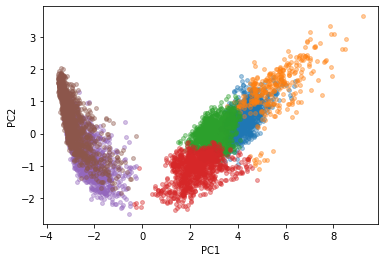

In [59]:
for indexes in clusters3:
    plt.scatter(X_train_pca[indexes,0], X_train_pca[indexes,1], alpha = 0.4, s = 15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## OPTICS

In [155]:
from sklearn.cluster import OPTICS

In [191]:
optics = OPTICS(min_samples = 15, cluster_method = 'dbscan', eps = 1.0)
optics.fit(X_train_pca)

OPTICS(cluster_method='dbscan', eps=1.0, min_samples=15)

In [192]:
from sklearn.metrics import silhouette_score
silhouette_score(X[optics.labels_ != -1], optics.labels_[optics.labels_ != -1])

0.4086308805414816

In [193]:
np.unique(optics.labels_, return_counts=True)

(array([-1,  0,  1,  2]), array([ 180, 3964, 3086,   48], dtype=int64))

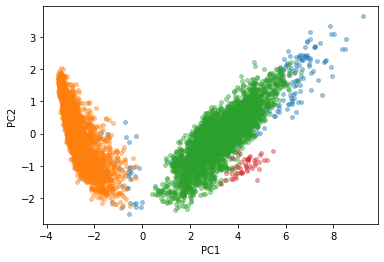

In [194]:
for cluster_id in np.unique(optics.labels_)[:10]:
    indexes = np.where(optics.labels_==cluster_id)
    plt.scatter(X_train_pca[indexes,0], X_train_pca[indexes,1], alpha=0.4, s = 15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [195]:
space = np.arange(len(X_train_pca))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

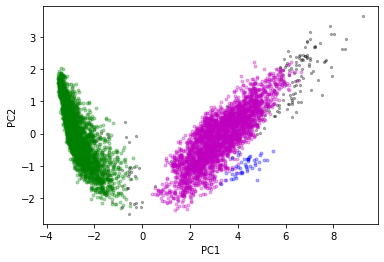

In [196]:
colors = ["g.", "m.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X_train_pca[optics.labels_ == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
plt.scatter(X_train_pca[optics.labels_ == -1, 0], X_train_pca[optics.labels_ == -1, 1], color ="k", alpha=0.3, s = 5)
#plt.set_title("Automatic Clustering\nOPTICS")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

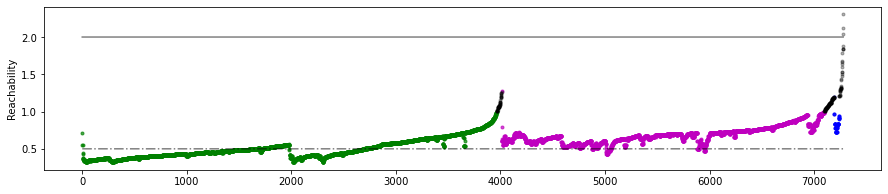

In [198]:
# Reachability plot
plt.figure(figsize=(15, 4))
colors = ["g.", "m.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.7)
plt.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
plt.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
plt.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
plt.ylabel("Reachability")
plt.show()
#plt.set_ylabel("Reachability (epsilon distance)")
#plt.set_title("Reachability Plot")